<a href="https://colab.research.google.com/github/ard18/ratemaking_with_python/blob/main/Ratemaking_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pricing(Ratemaking) Worker's Compensation Premiums using Actuarial Techniques

# Mount Google Drive

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)

In [ ]:
# export dataset from drive to colab
from google.colab import drive
drive.mount('/content/drive')
filepath = "/content/drive/MyDrive/Colab Notebooks/datasets/Project/worker-comp/wkcomp_pos.csv"

dataset = pd.DataFrame(pd.read_csv(filepath))
dataset # the worker's compensation dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_D,CumPaidLoss_D,BulkLoss_D,EarnedPremDIR_D,EarnedPremCeded_D,EarnedPremNet_D,Single,PostedReserve97_D
0,86,Allstate Ins Co Grp,1988,1988,1,367404,70571,127737,400699,5957,394742,0,281872
1,86,Allstate Ins Co Grp,1988,1989,2,362988,155905,60173,400699,5957,394742,0,281872
2,86,Allstate Ins Co Grp,1988,1990,3,347288,220744,27763,400699,5957,394742,0,281872
3,86,Allstate Ins Co Grp,1988,1991,4,330648,251595,15280,400699,5957,394742,0,281872
4,86,Allstate Ins Co Grp,1988,1992,5,354690,274156,27689,400699,5957,394742,0,281872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,44300,Tower Ins Co Of NY,1997,2002,6,334,287,15,4387,3374,1013,1,1187
13196,44300,Tower Ins Co Of NY,1997,2003,7,318,293,2,4387,3374,1013,1,1187
13197,44300,Tower Ins Co Of NY,1997,2004,8,323,300,7,4387,3374,1013,1,1187
13198,44300,Tower Ins Co Of NY,1997,2005,9,310,297,0,4387,3374,1013,1,1187


In [ ]:
# dataset columns/features
columns = dataset.columns
print("Columns/Features present in dataset:\n")
for i in columns:
    print(i)

Columns/Features present in dataset:

GRCODE
GRNAME
AccidentYear
DevelopmentYear
DevelopmentLag
IncurLoss_D
CumPaidLoss_D
BulkLoss_D
EarnedPremDIR_D
EarnedPremCeded_D
EarnedPremNet_D
Single
PostedReserve97_D


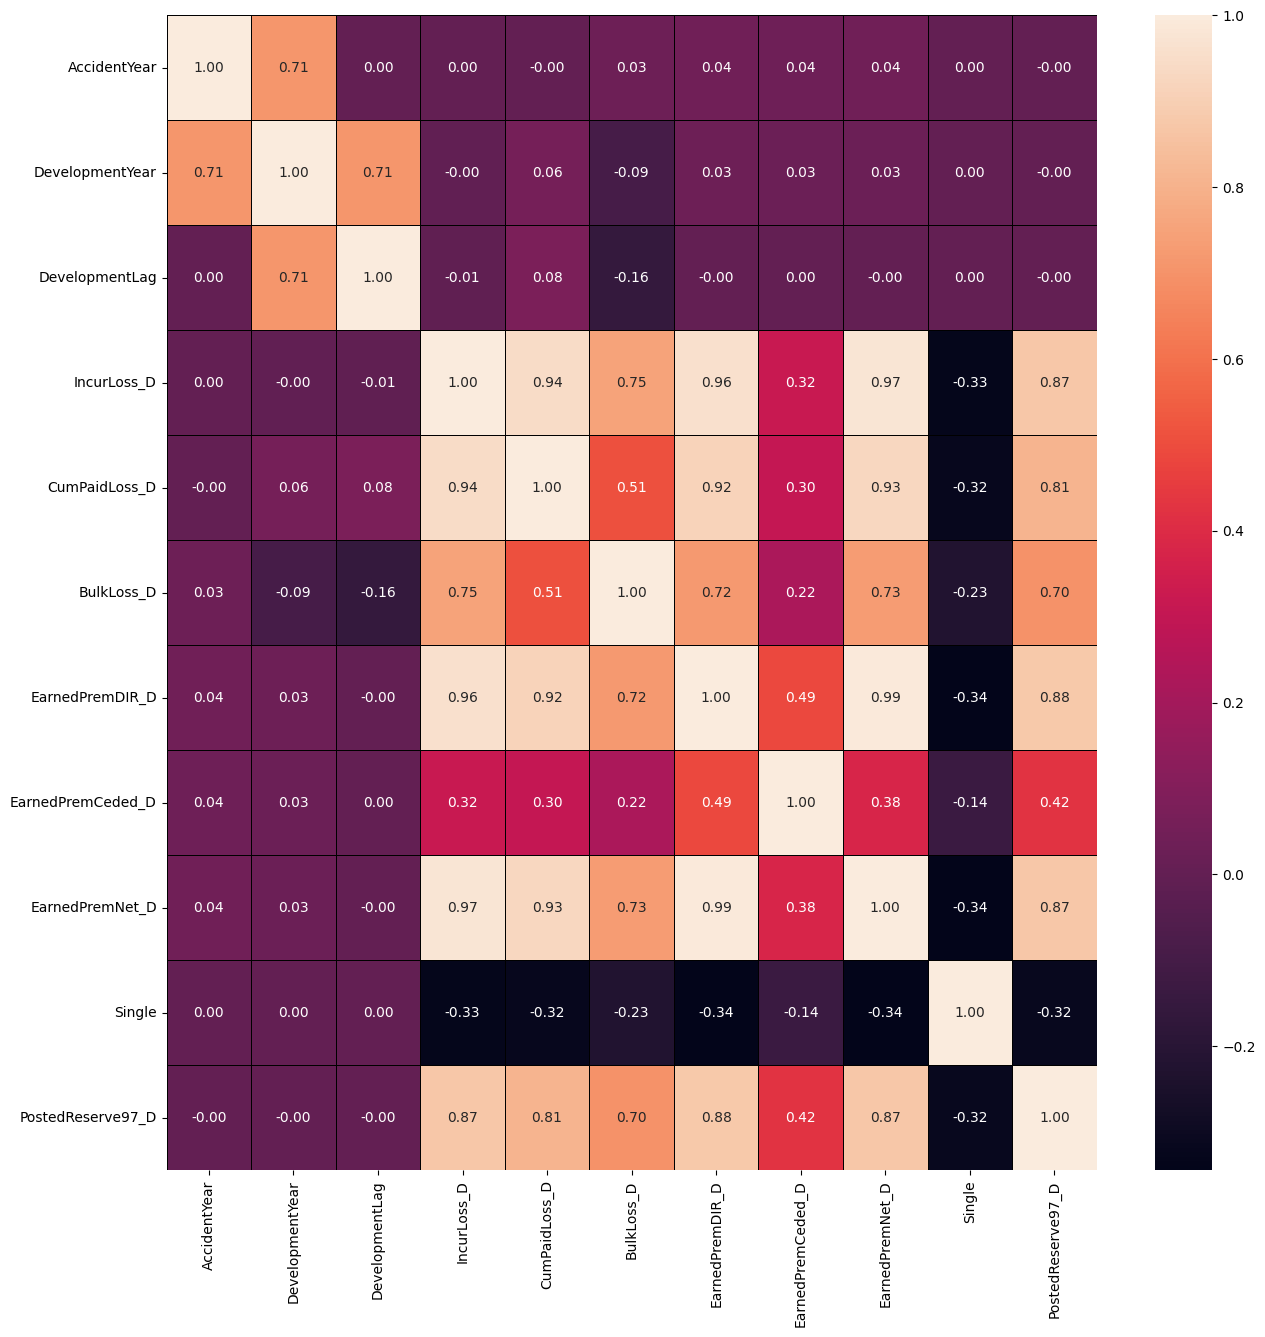

In [ ]:
# create a heatmap or correlation map for dataset
df_corr = dataset.drop(columns=['GRCODE','GRNAME'])
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_corr.corr(), ax=ax, annot=True, linewidths=0.36, linecolor="black", fmt=".2f")
plt.show()

We see that there's a strong positive correlation between the following features:
- PostedReserve97_D with IncurLoss_D, CumPaidLoss_D, EarnedPremDIR_D and EarnedPremNet_D  
- EarnedPremNet_D with CumPaidLoss_D and IncurLoss_D

In [ ]:
# missing values
if(dataset.isnull().any().sum() == 0):
    print("No missing values present in dataset")
else:
    print("Missing values present in dataset")

No missing values present in dataset


# Choose your Company using GRCODE

In [ ]:
# Companies in dataset
dataset["GRCODE-GRNAME"] = dataset['GRCODE'].astype('str')+"-"+dataset['GRNAME']
companies = dataset["GRCODE-GRNAME"]
print("Number of Companies present in dataset {}\n".format(len(pd.unique(companies))))
for i in pd.unique(companies):
    print(i)

Number of Companies present in dataset 132

86-Allstate Ins Co Grp
337-California Cas Grp
353-Celina Mut Grp
388-Federal Ins Co Grp
460-Buckeye Ins Grp
655-FM Global
671-Farm Bureau Of MI Grp
711-Patrons Grp
715-West Bend Mut Ins Grp
965-Secura Ins Co
1066-Island Ins Cos Grp
1090-Kentucky Farm Bureau Mut Ins Grp
1236-Shelter Ins Cos Grp
1252-Penn Miller Grp
1538-Farmers Automobile Grp
1767-State Farm Mut Grp
2135-Erie Ins Exchange Grp
2143-Farmers Alliance Mut & Affiliates
2623-Canal Ins Co Grp
2712-Pennsylvania Natl Ins Grp
3000-Horace Mann Grp
3034-Preferred Risk Mut Grp
3240-NC Farm Bureau Ins Grp
4839-FL Farm Bureau Grp
5010-Capitol Transamerican Grp
5185-Grinnell Mut Grp
5940-American Contractors Ins Grp
6408-Mutual Benefit Grp
6807-Amerisafe Grp
7080-New Jersey Manufacturers Grp
7714-Keystone Ins Grp
8168-Commerce Grp Inc
8427-Farm Bureau Grp
8559-Millers Mut Ins Assoc
8672-Protective Ins Grp
9466-Lumber Ins Cos
10011-Mada Ins Exchange
10022-Agway Ins Co
10048-Hyundai Marine & Fi

## We select a sample of 5 companies

In [ ]:
sample_companies = ["Allstate Ins Co Grp", "California Cas Grp", "Celina Mut Grp", "Federal Ins Co Grp", "Farm Bureau of MI Grp"]
grcodes = [86, 337, 353, 388, 671]
df_comp = pd.DataFrame(
    {
        'GRCODE':grcodes,
        'NAME':sample_companies,
    }
)
print("Sample of 5 companies taken for this project. Select a company from the below:")
df_comp

Sample of 5 companies taken for this project. Select a company from the below:


,GRCODE,NAME
0,86,Allstate Ins Co Grp
1,337,California Cas Grp
2,353,Celina Mut Grp
3,388,Federal Ins Co Grp
4,671,Farm Bureau of MI Grp


In [ ]:
# select a grcode
slt_comp = int(input("Select a grcode from:"))

Select a grcode from:353


# Functions for Loss Development using Chain-Ladder Method

In [ ]:
# python class that consists of 4 different averaging methods for averaging loss-development factors
class AveragingMethods:
    def __init__(self, data):
        '''Here, Data is of type list'''
        self.data = data
    def SimpleAvg(self): # simple average
        sum = 0
        for i in self.data:
            sum += i
        return round( sum/len(self.data), 4)
    def VolumeAvg(self, dt1, dt2): # volume-weighted average
        sum1 = 0
        for i in dt1:
            sum1 += i
        sum2 = 0
        for j in dt2:
            sum2 += j
        return round( sum1/sum2,4)
    def MedialAvg(self): # medial average
        minimum = min(self.data)
        maximum = max(self.data)
        sum = 0
        if len(self.data) > 2:
            for i in self.data:
                sum += i
            sum -= (maximum+minimum)
            return round( sum/(len(self.data)-2),4)
        else:
            return  round( (maximum+minimum)/2,4)
    def GeometricAvg(self): # geometric average
        sum = 1
        for i in self.data:
            sum *= i
        return round( sum**(1/len(self.data)),4)


def LossData(grcode):
    '''This function extracts the loss data of a specific company corresponding to its GRCODE
        Here data is of type: dataframe'''
    company = dataset[dataset["GRCODE"]==grcode]
    return(company)


def createLossTriangle(data):
    '''This function extracts and creates Loss triangles for Cumulative Paid Losses
        Here data is of type: dataframe'''
    trframe = {}      # dict containing loss triangle values for various accident years
    for i in range(1988,1998):
        L = []
        for j in range(i,1998):
            condition = ( (data['AccidentYear']==i) & (data['DevelopmentYear']==j) )
            L.append(int(data.loc[condition]['CumPaidLoss_D']))
        i = int(i)
        trframe[i] = L
    return trframe


def displayTriangleData(data):
    '''This function displays Loss Triangle data
       Here data is of type: dictionary'''
    for i in data.keys():
        print(i, end = "\t\t")
        for j in data[i]:
            print(j, end = "\t")
        print("\n")


def computeLDF(data):
    '''This function computes Loss Development Factors
       Here data is of type: dictionary'''
    trframe = {}
    for i in data.keys():
        L = []
        for j in range(len(data[i])-1):
            ldf = data[i][j+1]/data[i][j]
            L.append( round(ldf,4) )
        i = int(i)
        trframe[i] = L
    return trframe


def computeAverageLDF(ldf_info, loss_info):
    '''This function computes various Averages of Loss Development Factors
       Here data is of type: dictionary'''
    print("Available averaging methods:\n\
            1. Simple Average :- Latest 5\n\
            2. Volume-Weighted Average :- Latest 5\n\
            3. Medial Average :- Latest 5\n\
            4. Geometric Average :- Latest 5\n")
    DK = list(ldf_info.keys())
    DK = sorted(DK, reverse=True)
    trframe = {
        'SimpleAvg':[],
        'VolumeAvg':[],
        'MedialAvg':[],
        'GeometricAvg':[]
    }
    # for Medial, Simple and Geometric Averages
    for i in range(0,10):
        L = []
        c = 1
        for j in DK:
            try:    # to avoid Index Out of Bounds
                if ldf_info[j][i] and c<=5:
                    L.append(ldf_info[j][i])
                    c+=1
            except:
                pass
        if(L!=[]):
            obj = AveragingMethods(L)               # object of class Averaging methods
            simp_avg = obj.SimpleAvg()
            med_avg  = obj.MedialAvg()
            geo_avg  = obj.GeometricAvg()
            trframe['SimpleAvg'].append(simp_avg)
            trframe['MedialAvg'].append(med_avg)
            trframe['GeometricAvg'].append(geo_avg)
    # only for Volume-Weighted Average
    for i in range(1,10):
        L1 = []
        L2 = []
        c = 1
        for j in DK:
            try:
                if loss_info[j][i] and loss_info[j][i-1] and c<=5:
                    L1.append(loss_info[j][i])
                    L2.append(loss_info[j][i-1])
                    c+=1
            except:
                pass
        if(L1!=[] and L2!=[]):
            obj = AveragingMethods(L1)
            vol_avg = obj.VolumeAvg(L1, L2)
            trframe['VolumeAvg'].append(vol_avg)
    return trframe



# the loss data of selected company
loss_data = LossData(slt_comp)

# the loss development triangle
print("Loss Development Triangle\n")
loss_triangle = createLossTriangle(loss_data)
displayTriangleData(loss_triangle)
print("\n")

print("Loss Development Factors (Age-to-Age factors)\n")
ldf_triangle = computeLDF(loss_triangle)
displayTriangleData(ldf_triangle)
print("\n")

Loss Development Triangle

1988		1326	3140	4422	5036	5629	6060	6249	6325	6471	6489	

1989		1793	3698	5098	6093	6474	6497	6601	6731	6896	

1990		1941	4015	5589	6299	6586	6834	7031	7075	

1991		1477	3742	4798	4986	5091	5269	5323	

1992		1329	2593	2832	3222	3417	3527	

1993		519	927	1040	1009	1035	

1994		578	966	902	1004	

1995		375	575	646	

1996		306	501	

1997		339	



Loss Development Factors (Age-to-Age factors)

1988		2.368	1.4083	1.1389	1.1178	1.0766	1.0312	1.0122	1.0231	1.0028	

1989		2.0625	1.3786	1.1952	1.0625	1.0036	1.016	1.0197	1.0245	

1990		2.0685	1.392	1.127	1.0456	1.0377	1.0288	1.0063	

1991		2.5335	1.2822	1.0392	1.0211	1.035	1.0102	

1992		1.9511	1.0922	1.1377	1.0605	1.0322	

1993		1.7861	1.1219	0.9702	1.0258	

1994		1.6713	0.9337	1.1131	

1995		1.5333	1.1235	

1996		1.6373	

1997		





<ipython-input-25-a2d05aaaa954>:52: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  L.append(int(data.loc[condition]['CumPaidLoss_D']))


### Making dataframe out of dictionary for triangular loss data

In [ ]:
# Determine the maximum length of the arrays
max_length = max(len(arr) for arr in loss_triangle.values())
# Pad the arrays with NaN to make them all the same length
data_padded = {key: arr + [np.nan] * (max_length - len(arr)) for key, arr in loss_triangle.items()}
# Create DataFrame from the padded dictionary
loss_df = pd.DataFrame.from_dict(data_padded)
loss_df = loss_df.T
for i in range(0,max_length):
    loss_df.rename(columns={i:(i+1)*12,}, inplace=True)
print("Loss Triangle Dataframe")
loss_df

Loss Triangle Dataframe


,12,24,36,48,60,72,84,96,108,120
1988,1326.0,3140.0,4422.0,5036.0,5629.0,6060.0,6249.0,6325.0,6471.0,6489.0
1989,1793.0,3698.0,5098.0,6093.0,6474.0,6497.0,6601.0,6731.0,6896.0,NaN
1990,1941.0,4015.0,5589.0,6299.0,6586.0,6834.0,7031.0,7075.0,NaN,NaN
1991,1477.0,3742.0,4798.0,4986.0,5091.0,5269.0,5323.0,NaN,NaN,NaN
1992,1329.0,2593.0,2832.0,3222.0,3417.0,3527.0,NaN,NaN,NaN,NaN
1993,519.0,927.0,1040.0,1009.0,1035.0,NaN,NaN,NaN,NaN,NaN
1994,578.0,966.0,902.0,1004.0,NaN,NaN,NaN,NaN,NaN,NaN
1995,375.0,575.0,646.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,306.0,501.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,339.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Select LDF.
avg_ldf = computeAverageLDF(ldf_triangle, loss_triangle)
for i in avg_ldf.keys():
    print(i,"\t",avg_ldf[i],"\n")

try:
    chosen_Ldf = input("Select an averaging method from the above:")
    selected_Ldf = avg_ldf[chosen_Ldf]
except:
    print("Incorrect option entered. Taking Default option: Volume-Weighted Average.")
    selected_Ldf = avg_ldf['VolumeAvg']
for i in selected_Ldf:
    print(i,"\t")

# We select an arbitrary tail factor
tail = 1.0000
selected_Ldf.append(tail)
selected_Ldf = selected_Ldf[::-1]

# Cumulative Loss Development factors
cdf = []
for i in range(1, len(selected_Ldf)+1):
    f = 1
    for j in range(0, i):
        f*=selected_Ldf[j]
    cdf.append( round( f,4) )

print("\nCumulative Development Factor (CDF):\n", cdf[::-1])


Available averaging methods:
            1. Simple Average :- Latest 5
            2. Volume-Weighted Average :- Latest 5
            3. Medial Average :- Latest 5
            4. Geometric Average :- Latest 5

SimpleAvg 	 [1.7158, 1.1107, 1.0774, 1.0431, 1.037, 1.0215, 1.0127, 1.0238, 1.0028] 

VolumeAvg 	 [1.7902, 1.1607, 1.0896, 1.046, 1.0364, 1.0221, 1.0126, 1.0238, 1.0028] 

MedialAvg 	 [1.6982, 1.1125, 1.0931, 1.044, 1.035, 1.0224, 1.0122, 1.0238, 1.0028] 

GeometricAvg 	 [1.71, 1.1051, 1.0755, 1.043, 1.0368, 1.0215, 1.0127, 1.0238, 1.0028] 

Select an averaging method from the above:VolumeAvg
1.7902 	
1.1607 	
1.0896 	
1.046 	
1.0364 	
1.0221 	
1.0126 	
1.0238 	
1.0028 	

Cumulative Development Factor (CDF):
 [2.608, 1.4568, 1.2551, 1.1519, 1.1013, 1.0626, 1.0396, 1.0267, 1.0028, 1.0]


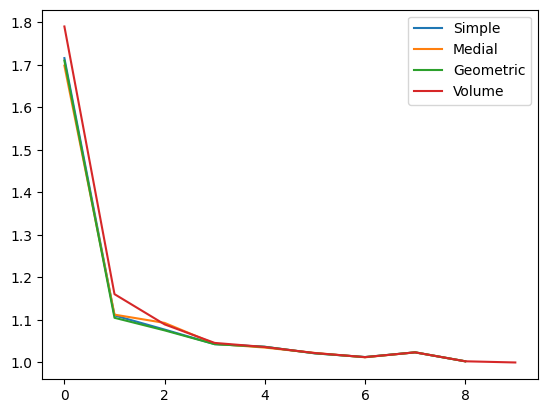

In [ ]:
plt.plot(avg_ldf['SimpleAvg'])
plt.plot(avg_ldf['MedialAvg'])
plt.plot(avg_ldf['GeometricAvg'])
plt.plot(avg_ldf['VolumeAvg'])

plt.legend( ['Simple','Medial','Geometric','Volume'] , loc='upper right')

In [ ]:
# Projected Ultimate Losses
proj_ultLosses = {}
for i in range(0, len(cdf)):
    for j in range(0, len(loss_triangle)):
        if(i==j):
            proj_ultLosses[ list(loss_triangle.keys())[j] ] = round( list(loss_triangle.values())[i][-1]*cdf[i],4)
print("Projected Ulimate Losses\n")
for i in proj_ultLosses.keys():
    print(i,"\t==>",proj_ultLosses[i])

Projected Ulimate Losses

1988 	==> 6489.0
1989 	==> 6915.3088
1990 	==> 7263.9025
1991 	==> 5533.7908
1992 	==> 3747.7902
1993 	==> 1139.8455
1994 	==> 1156.5076
1995 	==> 810.7946
1996 	==> 729.8568
1997 	==> 884.112


Lets evaluate the closeness of our projected ultimate losses to the actual ultimate losses.

In [ ]:
# metrics used: mean absolute error, and r^2 coefficient
from sklearn.metrics import mean_absolute_error as mae, r2_score as r2
# Actual Ultimate Losses
act_ultLosses = {}
for i in range(1988,1998):
        condition = ( (loss_data['AccidentYear']==i) & (loss_data['DevelopmentLag']==10) )
        act_ultLosses[i] = int( loss_data.loc[condition]['CumPaidLoss_D'])
print("Actual Ulimate Losses\n")
for i in act_ultLosses.keys():
    print(i,"\t==>",act_ultLosses[i])
mae1 = mae(list(act_ultLosses.values()), list(proj_ultLosses.values()))
print( "\nMean Absolute Error =",mae1 )
print("\nR^2 coefficient =", r2(list(act_ultLosses.values()), list(proj_ultLosses.values()) ) )

Actual Ulimate Losses

1988 	==> 6489
1989 	==> 6939
1990 	==> 7123
1991 	==> 5404
1992 	==> 3834
1993 	==> 1087
1994 	==> 1350
1995 	==> 931
1996 	==> 861
1997 	==> 669

Mean Absolute Error = 109.33928

R^2 coefficient = 0.9976615300017997


<ipython-input-30-16380853b9aa>:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  act_ultLosses[i] = int( loss_data.loc[condition]['CumPaidLoss_D'])


## Using GLMs for projecting Ultimate Losses

In [ ]:
import statsmodels.api as sm
import warnings
def GLM_UltClaims(dataset):
    '''The dataset used here is a dataframe.
    This function outputs a dataframe having projected the lower half of the original dataset, i.e., projected losses'''
    # dataset is a dataframe
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    i = 0
    k = 9
    while i<9:
        x_train = [ dataset.iloc[j,i] for j in range(0,k)   ]
        y_train = [ dataset.iloc[j,i+1] for j in range(0,k) ]
        x_test =  [ dataset.iat[j,i] for j in range(k,10)   ]

        glm_model = sm.GLM(y_train,x_train,family=sm.families.Gaussian()) # using gaussian glm
        model_results = glm_model.fit(method="bfgs")
        y_test = model_results.predict(x_test)

        for j in range(0,len(y_test)):
            dataset.iat[k+j,i+1] = y_test[j]
        i+=1
        k-=1
    return dataset

data = GLM_UltClaims(loss_df)
print("GLM projected claims in the lower triangle")
data

GLM projected claims in the lower triangle


,12,24,36,48,60,72,84,96,108,120
1988,1326.0,3140.000000,4422.000000,5036.000000,5629.000000,6060.000000,6249.000000,6325.000000,6471.000000,6489.000000
1989,1793.0,3698.000000,5098.000000,6093.000000,6474.000000,6497.000000,6601.000000,6731.000000,6896.000000,6915.182197
1990,1941.0,4015.000000,5589.000000,6299.000000,6586.000000,6834.000000,7031.000000,7075.000000,7243.686846,7263.836184
1991,1477.0,3742.000000,4798.000000,4986.000000,5091.000000,5269.000000,5323.000000,5389.202579,5517.695525,5533.043774
1992,1329.0,2593.000000,2832.000000,3222.000000,3417.000000,3527.000000,3606.365321,3651.217977,3738.272739,3748.671273
1993,519.0,927.000000,1040.000000,1009.000000,1035.000000,1071.764176,1095.881247,1109.510810,1135.964503,1139.124349
1994,578.0,966.000000,902.000000,1004.000000,1064.154947,1101.954734,1126.751159,1140.764654,1167.963522,1171.212378
1995,375.0,575.000000,646.000000,727.382776,770.964123,798.349496,816.314130,826.466694,846.171862,848.525608
1996,306.0,501.000000,662.730144,746.220575,790.930594,819.025195,837.455078,847.870574,868.086067,870.500771
1997,339.0,726.033347,960.407554,1081.399245,1146.191590,1186.905396,1213.613400,1228.707207,1258.002860,1261.502173


In [ ]:
# GLM projected ultimate Losses
glmUlt_Losses = {}
for i in range(0,len(loss_triangle.keys())):
    glmUlt_Losses[list(loss_triangle.keys())[i]] = data.iat[i,9]
print("GLM Projected Ulimate Losses\n")
for i in glmUlt_Losses.keys():
    print(i,"\t==>",glmUlt_Losses[i])
mae2 = mae(list(act_ultLosses.values()), list(glmUlt_Losses.values()) )
print( "\nMean Absolute Error =",mae2)
print("\nR^2 coefficient =", r2(list(act_ultLosses.values()), list(glmUlt_Losses.values() ) ))

GLM Projected Ulimate Losses

1988 	==> 6489.0
1989 	==> 6915.182197496523
1990 	==> 7263.83618390146
1991 	==> 5533.043773598917
1992 	==> 3748.6712728301954
1993 	==> 1139.124348965272
1994 	==> 1171.2123776352764
1995 	==> 848.5256081131403
1996 	==> 870.500770997572
1997 	==> 1261.502172546222

Mean Absolute Error = 129.44157939343074

R^2 coefficient = 0.9937251123368604


### Select the losses of the method producing lower MAE

In [ ]:
if mae1 < mae2:
    print("Chain-Ladder Projected Losses selected")
    ULT_LOSSES = proj_ultLosses
else:
    print("GLM Projected Losses selected")
    ULT_LOSSES = glmUlt_Losses
for i in ULT_LOSSES.keys():
    print(i,"===>",ULT_LOSSES[i])

Chain-Ladder Projected Losses selected
1988 ===> 6489.0
1989 ===> 6915.3088
1990 ===> 7263.9025
1991 ===> 5533.7908
1992 ===> 3747.7902
1993 ===> 1139.8455
1994 ===> 1156.5076
1995 ===> 810.7946
1996 ===> 729.8568
1997 ===> 884.112


# Calculating Rate and Benefit Adjustment Factors
We use a simple general formula derived by Richard A. Bill for automating the calculation of rate and benefit adjustment factors. This is based on the parallelogram method. More details on the formula can be found in the paper by Richard A. Bill on:
https://www.casact.org/abstract/generalized-earned-premium-rate-adjustment-factors


We exclude any fluctuations arising due to legal changes.

## Adjusting Premiums for Rate Changes


In [ ]:
# Net Premium Earned (Earned Premium - Ceded Earned Premium(or Reinsurance costs))
net_prem_earned = {}
for i in range(1988,1998):
    net_prem_earned[i] = list( loss_data[loss_data['AccidentYear']==i]['EarnedPremNet_D'] )[0]

print("Net Premium Earned\n")
for i in net_prem_earned.keys():
    print(i,"\t==>",net_prem_earned[i])

Net Premium Earned

1988 	==> 7808
1989 	==> 8177
1990 	==> 9132
1991 	==> 8959
1992 	==> 7640
1993 	==> 4080
1994 	==> 2957
1995 	==> 2381
1996 	==> 1751
1997 	==> 1007


We will assume some rate changes. (Other rate changes can be assumed)

In [ ]:
import datetime
# Assume rate changes (values taken similar to those in Massachusetts Rate Filings)
rate_changes = {
            datetime.date(1988,4,1):0.198, #datetime.date(1989,1,1):0.1,
                datetime.date(1990,7,1):0.262, #datetime.date(1991,4,1):-0.04,
            datetime.date(1991,5,1):0.113,  #datetime.date(1992,3,1):0.07,
            datetime.date(1993,8,1):0.062, #datetime.date(1994,2,1):0.08,
            datetime.date(1996,5,1):-0.122
                }
# first calculate the rate change indeces
rates = list(rate_changes.values())
rate_index =[1.00]+[ (1+i) for i in rates ] # including initial index of segment without changes = 1.00 (rate change = 0%)
print("Rate change indeces:\n",rate_index)
cum_index = []
f = 1
for i in rate_index:
    f *= i
    cum_index.append( round(f, 4))
print("Cumulative rate change indeces:\n",cum_index)
current_cum_rate_index = cum_index[-1]
print("Current Cumulative Rate Level Index =",current_cum_rate_index)

Rate change indeces:
 [1.0, 1.198, 1.262, 1.113, 1.062, 0.878]
Cumulative rate change indeces:
 [1.0, 1.198, 1.5119, 1.6827, 1.787, 1.569]
Current Cumulative Rate Level Index = 1.569


In [ ]:
# To calculate the portions earned by premiums under each rate change
import datetime
T = 1; E = 1;

def months_between(date1,date2):
    '''This function calculates the difference between 2 given dates in months
    date1, date2 are in datetime.date() format'''
    m1=date1.year*12+date1.month
    m2=date2.year*12+date2.month
    months=m1-m2    # difference between the dates

    return months/12



def find_remains(rate_dates, earned_prem_year, L):
    '''This function calculates the remaining portions of earned premium under the rate changes
       rate_dates is a dictionary containing the dates of rate changes, earned_prem_year is the year whose premiums are being adjusted, L is a list'''
    if L!=[]:
        L.append(0) # appending 0 as a means for calculating the last portion
        to_return = []  # the list that contains the portions
        max = 1 # maximum value (total area of an year of earned premium)
        for i in range(0, len(L)):
            if L[i]!=0:
                diff = max - L[i]   # calculate remaining portion
                to_return.append(round( diff,5))
                max = L[i]
                if L[i+1]==0:   # for the last portion to be appended
                    to_return.append(round( max,5))
            else:
                to_return.append(0)

        if to_return.count(0) == len(to_return):
            to_return = earnedPortion_ForUnaffectedYear(rate_dates, earned_prem_year, to_return)

        to_return.pop()
        return to_return



def earnedPortion_ForUnaffectedYear(rate_dates, earned_prem_year, L):
    '''This function sets the portion earned by premium for that year as 1 if there are no rate changes affecting that year
    rate_dates is a dictionary containing the dates of rate changes, earned_prem_year is the year whose premiums are being adjusted, L is a list'''
    c = 0
    start_date = datetime.date(earned_prem_year,1,1)
    for i in rate_dates:
        if( months_between(i, start_date)>0 ):      # checking where to insert 1
            break
        else:
            c+=1
    L.insert(c,1)   # insert 1 as portion earned by premium
    return L



def earnedPortion(rate_dates, earned_prem_years):
    '''This function calculates the portion of earned premium under given rate changes
    rate_dates is a dictionary containing the dates of rate changes and earned_prem_years is also a dictionary containing the years in which premium is earned'''
    portion = {}
    for i in earned_prem_years:
        portion[i] = []
    for i in earned_prem_years:
        start_date = datetime.date(i,1,1)
        for j in rate_dates:

            if months_between(j, start_date)<1 and months_between(j, start_date)>-1:
                # algorithm for calculating portions of earned premium
                D = months_between(j, start_date)

                A = D+T
                B = max( A-E, 0 )
                C = max( D, 0 )

                P = 1 - ( (pow(A,2)-pow(B,2)-pow(C,2)) / (2*E*T) )
                portion[i].append( round(P, 5))
            else:
                portion[i].append(0)

    # print(portion)
    for i in portion.keys():
        portion[i] = find_remains(rate_dates, i, portion[i])
    return(portion)


rate_effec_dates = list( rate_changes.keys())
years_toAdjust = list( net_prem_earned.keys() )
earned_NetPremPortion = earnedPortion(rate_effec_dates, years_toAdjust)
print("The portion earned by the premium in the years w.r.t. the rate changes are:\n")
for i in earned_NetPremPortion.keys():
    print(i,"===>",earned_NetPremPortion[i])

The portion earned by the premium in the years w.r.t. the rate changes are:

1988 ===> [0.71875, 0.28125, 0, 0, 0, 0]
1989 ===> [0.03125, 0.96875, 0, 0, 0, 0]
1990 ===> [0, 0.875, 0.125, 0, 0, 0]
1991 ===> [0, 0.125, 0.65278, 0.22222, 0, 0]
1992 ===> [0, 0, 0.05556, 0.94444, 0, 0]
1993 ===> [0, 0, 0, 0.91319, 0.08681, 0]
1994 ===> [0, 0, 0, 0.17014, 0.82986, 0]
1995 ===> [0, 0, 0, 0, 1, 0]
1996 ===> [0, 0, 0, 0, 0.77778, 0.22222]
1997 ===> [0, 0, 0, 0, 0.05556, 0.94444]


In [ ]:
# Average Cumulative Rate Level Indices

def AvgCumulIndices(L, cumul_indices):
    '''This function calculates the average cumulative rate level indices for the earned premium
    L, cumul_indices are numpy arrays where L contains the portions of earned premiums and cumul_indices contains the cumulative rate level indices'''
    prod = L*cumul_indices
    sum = 0
    for i in prod:
        sum+=i
    return round(sum, 5)

# changing to numpy arrays
for i in earned_NetPremPortion.keys():
    earned_NetPremPortion[i] = np.array(earned_NetPremPortion[i])
cum_index = np.array(cum_index)

avg_CumulIndices = {}
for i in earned_NetPremPortion.keys():
    avg_CumulIndices[i] = AvgCumulIndices(earned_NetPremPortion[i], cum_index)

print("\nThe Average Cumulative Rate Level Indices are:")
for i in avg_CumulIndices.keys():
    print(i,"\t==>",avg_CumulIndices[i])


The Average Cumulative Rate Level Indices are:
1988 	==> 1.05569
1989 	==> 1.19181
1990 	==> 1.23724
1991 	==> 1.51062
1992 	==> 1.67321
1993 	==> 1.69175
1994 	==> 1.76925
1995 	==> 1.787
1996 	==> 1.73856
1997 	==> 1.58111


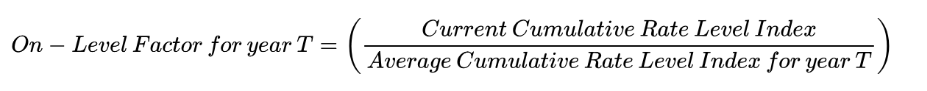

In [ ]:
# On-Level Factors for the premiums
onlevel = {}
print("Current Cumulative Rate Level Index =",current_cum_rate_index)
for i in avg_CumulIndices.keys():
    onlevel[i] = round( current_cum_rate_index/avg_CumulIndices[i], 5 )
print("\nThe On-Level Factors are:")
for i in onlevel.keys():
    print(i,"\t==>",onlevel[i])

Current Cumulative Rate Level Index = 1.569

The On-Level Factors are:
1988 	==> 1.48623
1989 	==> 1.31649
1990 	==> 1.26815
1991 	==> 1.03865
1992 	==> 0.93772
1993 	==> 0.92744
1994 	==> 0.88682
1995 	==> 0.87801
1996 	==> 0.90247
1997 	==> 0.99234


In [ ]:
# On-Levelling the Premiums
AdjustedPrem = {}
for i in onlevel.keys():
    AdjustedPrem[i] = round( net_prem_earned[i] * onlevel[i], 5)
print("The On-Level Net Premiums are:\n")
for i in AdjustedPrem.keys():
    print(i,"\t==>",AdjustedPrem[i])

The On-Level Net Premiums are:

1988 	==> 11604.48384
1989 	==> 10764.93873
1990 	==> 11580.7458
1991 	==> 9305.26535
1992 	==> 7164.1808
1993 	==> 3783.9552
1994 	==> 2622.32674
1995 	==> 2090.54181
1996 	==> 1580.22497
1997 	==> 999.28638


## Adjusting Losses for Benefit Changes

In [ ]:
# Assume benefit changes (Other benefit changes can be assumed)
benefit_changes = {
            # datetime.date(1988,4,1):0.05,
                 datetime.date(1989,1,1):0.1,
            # datetime.date(1990,7,1):-0.02,
                 datetime.date(1991,4,1):-0.04,
            # datetime.date(1991,5,1):0.11,
                 datetime.date(1992,3,1):0.07,
            # datetime.date(1993,8,1):-0.05,
                 datetime.date(1994,2,1):0.08,
            # datetime.date(1996,8,1):0.15
                }
# first calculate the benefit change indeces
benefits = list(benefit_changes.values())
benefit_index =[1.00]+[ (1+i) for i in benefits ] # including initial index without changes = 1.00 (rate change = 0%)
print("Benefit change indeces:\n",benefit_index)
loss_lvl = []
f = 1
for i in benefit_index:
    f *= i
    loss_lvl.append( round(f, 4))
print("Loss Level indeces (Cumulative indeces):\n",loss_lvl)
current_loss_lvl = loss_lvl[-1]
print("Current Loss Level =",current_loss_lvl)

Benefit change indeces:
 [1.0, 1.1, 0.96, 1.07, 1.08]
Loss Level indeces (Cumulative indeces):
 [1.0, 1.1, 1.056, 1.1299, 1.2203]
Current Loss Level = 1.2203


In [ ]:
import datetime
T = 1; E = 1;

def months_between(date1,date2):
    '''This function calculates the difference between 2 given dates in months
    date1, date2 are in datetime.date() format'''
    m1=date1.year*12+date1.month
    m2=date2.year*12+date2.month
    months=m1-m2    # difference between the dates

    return months/12



def find_remains(ben_dates, loss_year, L):
    '''This function calculates the remaining portions of earned premium under the rate changes
       ben_dates is a list containing the dates of benefit changes, loss_year is the year whose losses are being adjusted, L is a list'''
    if L!=[]:
        L.append(0) # appending 0 as a means for calculating the last portion
        to_return = []  # the list that contains the portions
        max = 1 # maximum value (total area of an year of losses)
        for i in range(0, len(L)):
            if L[i]!=0:
                diff = max - L[i]   # calculate remaining portion
                to_return.append(round( diff,5))
                max = L[i]
                if L[i+1]==0:   # for the last portion to be appended
                    to_return.append(round( max,5))
            else:
                to_return.append(0)

        if to_return.count(0) == len(to_return):
            to_return = Portion_ForUnaffectedYear(ben_dates, loss_year, to_return)

        to_return.pop()
        return to_return



def Portion_ForUnaffectedYear(ben_dates, loss_year, L):
    '''This function sets the portion earned by premium for that year as 1 if there are no rate changes affecting that year
    ben_dates is a list containing the dates of benefit changes, loss_year is the year whose losses are being adjusted, L is a list'''
    c = 0
    start_date = datetime.date(loss_year,1,1)
    for i in ben_dates:
        if( months_between(i, start_date)>0 ):      # checking where to insert 1
            break
        else:
            c+=1
    L.insert(c,1)   # insert 1 as portion earned by premium
    return L



def LossPortion(ben_dates, loss_years):
    '''This function calculates the portion of earned premium under given rate changes
    ben_dates is a list containing the dates of benefit changes and loss_years is also a list containing the years in which losses occur'''
    portion = {}
    for i in loss_years:
        portion[i] = []
    for i in loss_years:
        start_date = datetime.date(i,1,1)
        for j in ben_dates:

            if months_between(j, start_date)<1 and months_between(j, start_date)>-1:
                # algorithm for calculating portions of earned premium
                D = months_between(j, start_date)

                A = D+T
                B = max( A-E, 0 )
                C = max( D, 0 )

                P = 1 - ( (pow(A,2)-pow(B,2)-pow(C,2)) / (2*E*T) )
                portion[i].append( round(P, 5))
            else:
                portion[i].append(0)

    for i in portion.keys():
        portion[i] = find_remains(ben_dates, i, portion[i])
    return(portion)


ben_effec_dates = list( benefit_changes.keys())
years_toAdjust = list( ULT_LOSSES.keys() )
LossesPortion = LossPortion(ben_effec_dates, years_toAdjust)
print("The portion of the losses in the years w.r.t. the benefit changes are:\n")
for i in LossesPortion.keys():
    print(i,"===>",LossesPortion[i])

The portion of the losses in the years w.r.t. the benefit changes are:

1988 ===> [1, 0, 0, 0, 0]
1989 ===> [0.5, 0.5, 0, 0, 0]
1990 ===> [0, 1, 0, 0, 0]
1991 ===> [0, 0.71875, 0.28125, 0, 0]
1992 ===> [0, 0.03125, 0.62153, 0.34722, 0]
1993 ===> [0, 0, 0.01389, 0.98611, 0]
1994 ===> [0, 0, 0, 0.57986, 0.42014]
1995 ===> [0, 0, 0, 0.00347, 0.99653]
1996 ===> [0, 0, 0, 0, 1]
1997 ===> [0, 0, 0, 0, 1]


In [ ]:
# Average Loss Levels

def AvgLossLevel(L, loss_levels):
    '''This function calculates the average Loss levels for the historical periods
    L, loss_levels are numpy arrays where L contains the portions of losses and loss_levels contains the loss levels'''
    prod = L*loss_levels
    sum = 0
    for i in prod:
        sum+=i
    return round(sum, 5)

for i in LossesPortion.keys():
    LossesPortion[i] = np.array(LossesPortion[i])
loss_lvl = np.array(loss_lvl)

avg_LossLvl = {}
for i in LossesPortion.keys():
    avg_LossLvl[i] = AvgLossLevel(LossesPortion[i], loss_lvl)

print("\nThe Average Loss Levels are:")
for i in avg_LossLvl.keys():
    print(i,"\t==>",avg_LossLvl[i])


The Average Loss Levels are:
1988 	==> 1.0
1989 	==> 1.05
1990 	==> 1.1
1991 	==> 1.08762
1992 	==> 1.08303
1993 	==> 1.12887
1994 	==> 1.16788
1995 	==> 1.21999
1996 	==> 1.2203
1997 	==> 1.2203


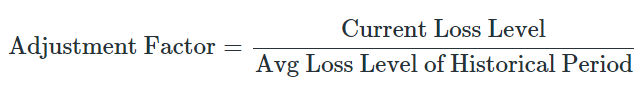

In [ ]:
# Adjustment Factors
adjusts = {}
print("Current Loss Level =",current_loss_lvl)
for i in avg_LossLvl.keys():
    adjusts[i] = round( current_loss_lvl/avg_LossLvl[i], 5 )
print("\nThe Adjustment Factors are:")
for i in adjusts.keys():
    print(i,"\t==>",adjusts[i])

Current Loss Level = 1.2203

The Adjustment Factors are:
1988 	==> 1.2203
1989 	==> 1.16219
1990 	==> 1.10936
1991 	==> 1.12199
1992 	==> 1.12675
1993 	==> 1.08099
1994 	==> 1.04488
1995 	==> 1.00025
1996 	==> 1.0
1997 	==> 1.0


In [ ]:
# Adjusting the Losses
AdjustedLosses = {}
for i in adjusts.keys():
    AdjustedLosses[i] = round( ULT_LOSSES[i] * adjusts[i], 5)
print("The Adjusted Losses are:\n")
for i in AdjustedLosses.keys():
    print(i,"\t==>",AdjustedLosses[i])

The Adjusted Losses are:

1988 	==> 7918.5267
1989 	==> 8036.90273
1990 	==> 8058.28288
1991 	==> 6208.85794
1992 	==> 4222.82261
1993 	==> 1232.16159
1994 	==> 1208.41166
1995 	==> 810.9973
1996 	==> 729.8568
1997 	==> 884.112


# Trending Loss Ratios

### We are getting data related to Annual Inflation Rates by country from World Bank's website: [data.worldbank.org](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?locations=US&view=chart)

In [ ]:
# Lets work on Inflation Rates first
filepath = "/content/drive/MyDrive/Colab Notebooks/datasets/Project/worker-comp/605_InflationRates.xlsx"

inflation_rates = pd.DataFrame(pd.read_excel(filepath, sheet_name="justTheInflation"))
inflation_rates

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.032258,1.073966,3.643045,3.121868,3.991628,5.836688,5.555556,3.873375,5.215560,6.311080,3.361391,3.225288,2.999948,1.869489,2.280372,4.044021,2.883604,3.315247,3.656365,2.529129,3.397787,3.608024,5.392568,8.955987,-2.135429,2.078141,4.316297,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.598394,15.224099,11.216471,14.238055,12.526893,15.069850,15.066512,14.461591,12.139918,11.567524,10.983863,13.006566,13.891972,12.563443,12.522254,12.558202,12.457914,17.678100,16.167612,13.135661,14.852815,12.288591,9.706586,10.249599,7.495256,7.819865,8.601485,5.840354,8.763754,7.449700,5.023421,8.558038,8.898164,8.450775,12.566645,8.954218,5.537538,8.971206,9.158707,5.750981,5.370290,5.245878,6.571396,6.399343,4.720811,4.653665,7.321106,6.824727,10.773751
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.686269,6.784597,8.680571,26.418664,-6.811161,2.178538,11.804186,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.799211,12.059765,10.671937,11.250000,7.354926,5.950965,0.248789,2.523659,0.869287,1.057361,1.741888,-0.062999,0.553456,31.841017,10.563289,4.914240,3.997142,4.471125,0.372266,2.530775,4.361529,3.188693,1.760904,0.694336,5.631634,4.415900,3.607368,8.452976,3.282440,1.784844,4.018699,4.578375,2.439201,1.768436,2.130817,1.487416,1.764635,1.784050,1.760112,2.437609,3.653533,7.967574
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.783784,299.509804,1378.527607,949.792531,2666.450593,4145.105982,219.176721,107.284822,248.195902,324.996872,152.561022,108.897436,98.224144,43.542107,22.953514,13.305210,12.251497,12.475829,13.730284,14.469656,13.482468,10.277905,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704,22.271564,25.754266,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.084813,-1.064727,-1.385189,0.621647,4.358497,9.350418,-2.410264,3.480508,7.336418,2.476738,1.767324,0.428958,-0.536929,0.273169,1.488234,1.053798,2.675992,0.198228,3.353691,11.580510
262,"Yemen, Rep.",YEM,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,29.411765,35.752298,49.394155,55.081107,30.733733,2.176727,5.976509,8.660219,4.590000,11.911591,12.238534,10.832361,12.515095,11.8

In [ ]:
# inflation rates in USA
inf_us = inflation_rates[inflation_rates['Country Name'] == "United States"]
inf_us

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
251,United States,USA,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.457976,1.070724,1.198773,1.239669,1.278912,1.585169,3.015075,2.772786,4.271796,5.462386,5.838255,4.292767,3.272278,6.17776,11.054805,9.143147,5.744813,6.501684,7.630964,11.254471,13.549202,10.334715,6.131427,3.212435,4.300535,3.545644,1.898048,3.664563,4.077741,4.827003,5.397956,4.234964,3.02882,2.951657,2.607442,2.80542,2.931204,2.33769,1.552279,2.188027,3.376857,2.826171,1.586032,2.270095,2.677237,3.392747,3.225944,2.852672,3.8391,-0.355546,1.640043,3.156842,2.069337,1.464833,1.622223,0.118627,1.261583,2.13011,2.442583,1.81221,1.233584,4.697859,8.0028


In [ ]:
inf_index = {}
start = 1988; end = 1997
for i in range(start, end+1):
    inf_index[i] = inf_us.iloc[0, i-1960+4]

print("The Inflation indeces are:\n")
for i in inf_index.keys():
    print(i,"===>",inf_index[i])

The Inflation indeces are:

1988 ===> 4.07774110744413
1989 ===> 4.82700303008944
1990 ===> 5.39795643990325
1991 ===> 4.23496396453849
1992 ===> 3.02881967814969
1993 ===> 2.95165696638559
1994 ===> 2.60744159215453
1995 ===> 2.80541968853662
1996 ===> 2.93120419993441
1997 ===> 2.33768993730735


In [ ]:
inf_avg = {}
keys = list(inf_index.keys())

for i in range(0,len(keys)):
    avg=0
    c=0
    for j in range(i,len(keys)):
        avg+= inf_index[keys[j]]
    inf_avg[keys[i]] = avg/(j-i+1)

print("Average Inflation rates:")
for i in inf_avg.keys():
    print(i,"===>",inf_avg[i])

Average Inflation rates:
1988 ===> 3.51998966044435
1989 ===> 3.458017277444375
1990 ===> 3.286894058363741
1991 ===> 2.985313718143811
1992 ===> 2.7770386770780315
1993 ===> 2.7266824768637
1994 ===> 2.670438854483227
1995 ===> 2.6914379419261265
1996 ===> 2.6344470686208803
1997 ===> 2.33768993730735


## Our Assumptions are:
### --> Policies are written uniformly over time.
### --> Premiums are earned uniformly over the policy period.
### --> Losses occur uniformly over the policy period.
### --> Policies have annual terms.


## Trend losses for inflation.
##### Our experience periods are the historical accident years from 1988 to 1997.
##### We assume future policy period begins on Jan 1, 1998 and inflation rate will be in effect for 12 months. Thus our forecast period average accident date is:
##### Midpoint of the period 1/1/1998 to 12/31/1999 = 1/1/1999

In [ ]:
loss_inf_period = {}
loss_forecast_Date = datetime.date(1999,1,1)
for i in inf_index.keys():
    expDate = datetime.date(i,7,1)
    diff = months_between(loss_forecast_Date,expDate)
    loss_inf_period[i] = diff

print("The trend periods for losses are :")
for i in loss_inf_period.keys():
    print(i,"===>",loss_inf_period[i])

loss_inf_factor = {}
for i in loss_inf_period.keys():
    loss_inf_factor[i] = (1 + (0.01*inf_avg[i]))**loss_inf_period[i]

print("\nThe trend factors for losses are :")
for i in loss_inf_factor.keys():
    print(i,"===>",loss_inf_factor[i])

The trend periods for losses are :
1988 ===> 10.5
1989 ===> 9.5
1990 ===> 8.5
1991 ===> 7.5
1992 ===> 6.5
1993 ===> 5.5
1994 ===> 4.5
1995 ===> 3.5
1996 ===> 2.5
1997 ===> 1.5

The trend factors for losses are :
1988 ===> 1.4379848464222695
1989 ===> 1.3812091144486356
1990 ===> 1.3163893271932503
1991 ===> 1.2468514717070853
1992 ===> 1.1948809881639835
1993 ===> 1.1594658084178389
1994 ===> 1.125911830979841
1995 ===> 1.0974122985214763
1996 ===> 1.0671681801399382
1997 ===> 1.035269487325222


In [ ]:
# Now we trend the losses
inf_trendedLosses = {}
for i in loss_inf_factor.keys():
    inf_trendedLosses[i] = AdjustedLosses[i]*loss_inf_factor[i]

print("The Projected_Ultimate_Losses\tBenefit_Adjusted_Losses\tInflation_Trended_Losses are:\n")
for i in inf_trendedLosses.keys():
    print(i,"\t  ===>",ULT_LOSSES[i],"\t ===>",AdjustedLosses[i],"\t==>",inf_trendedLosses[i])

The Projected_Ultimate_Losses	Benefit_Adjusted_Losses	Inflation_Trended_Losses are:

1988 	  ===> 6489.0 	 ===> 7918.5267 	==> 11386.72140059014
1989 	  ===> 6915.3088 	 ===> 8036.90273 	==> 11100.643302613122
1990 	  ===> 7263.9025 	 ===> 8058.28288 	==> 10607.837578736087
1991 	  ===> 5533.7908 	 ===> 6208.85794 	==> 7741.523660109222
1992 	  ===> 3747.7902 	 ===> 4222.82261 	==> 5045.770453078012
1993 	  ===> 1139.8455 	 ===> 1232.16159 	==> 1428.6492340507596
1994 	  ===> 1156.5076 	 ===> 1208.41166 	==> 1360.5649846879892
1995 	  ===> 810.7946 	 ===> 810.9973 	==> 889.9984110877112
1996 	  ===> 729.8568 	 ===> 729.8568 	==> 778.8799530187589
1997 	  ===> 884.112 	 ===> 884.112 	==> 915.2941769780766


## Trend Premiums for inflation.
##### Trend will be estimated from earned premium data. The trend period will be from the average earned date in each historical period to the average earned date at the new rate level. Because of the uniform assumption, the average earned date of a period is the midpoint of the first and last dates that premiums could be earned in that period. So, these dates will depend on the policy term length.
##### Future policy period begins in Jan 1, 1998. Inflation rate will be in effect for 12 months. Thus our forecast period average earned date is:
##### Midpoint of the period 1/1/1998 to 12/31/1999 = 1/1/1999

In [ ]:
prem_inf_period = {}
prem_forecast_Date = datetime.date(1999,1,1)
for i in inf_index.keys():
    expDate = datetime.date(i,1,1)
    diff = months_between(prem_forecast_Date,expDate)
    prem_inf_period[i] = diff

print("The trend periods for premium are :\n")
for i in prem_inf_period.keys():
    print(i,"===>",prem_inf_period[i])

prem_inf_factor = {}
for i in prem_inf_period.keys():
    prem_inf_factor[i] = (1 + (0.01*inf_avg[i]))**prem_inf_period[i]

print("\nThe trend factors for premium are :\n")
for i in prem_inf_factor.keys():
    print(i,"===>",prem_inf_factor[i])

The trend periods for premium are :

1988 ===> 11.0
1989 ===> 10.0
1990 ===> 9.0
1991 ===> 8.0
1992 ===> 7.0
1993 ===> 6.0
1994 ===> 5.0
1995 ===> 4.0
1996 ===> 3.0
1997 ===> 2.0

The trend factors for premium are :

1988 ===> 1.4630744271811034
1989 ===> 1.4048873794184469
1990 ===> 1.3378485784268548
1991 ===> 1.2653258203591393
1992 ===> 1.211358528213734
1993 ===> 1.1751669735133035
1994 ===> 1.1408461782138526
1995 ===> 1.1120823306899619
1996 ===> 1.0811337893487467
1997 ===> 1.0473002781704457


In [ ]:
# Now we trend the premiums
inf_trendedPrems = {}
for i in prem_inf_factor.keys():
    inf_trendedPrems[i] = AdjustedPrem[i]*prem_inf_factor[i]

print("The Net_Premiums_Earned\tRate_Adjusted_Premiums\tInflation_Trended_Premiums are:\n")
for i in inf_trendedPrems.keys():
    print(i,"\t  ===>",net_prem_earned[i],"\t ===>",AdjustedPrem[i],"\t==>",inf_trendedPrems[i])

The Net_Premiums_Earned	Rate_Adjusted_Premiums	Inflation_Trended_Premiums are:

1988 	  ===> 7808 	 ===> 11604.48384 	==> 16978.22354694037
1989 	  ===> 8177 	 ===> 10764.93873 	==> 15123.526561989844
1990 	  ===> 9132 	 ===> 11580.7458 	==> 15493.28430565277
1991 	  ===> 8959 	 ===> 9305.26535 	==> 11774.192512648224
1992 	  ===> 7640 	 ===> 7164.1808 	==> 8678.391509745092
1993 	  ===> 4080 	 ===> 3783.9552 	==> 4446.779180293926
1994 	  ===> 2957 	 ===> 2622.32674 	==> 2991.671439356991
1995 	  ===> 2381 	 ===> 2090.54181 	==> 2324.854608469612
1996 	  ===> 1751 	 ===> 1580.22497 	==> 1708.4346098396095
1997 	  ===> 1007 	 ===> 999.28638 	==> 1046.5529037459378


# Expenses and Profits

## Assume fixed expense provision and variable expense provision. Also assume underwiting profit provision.

In [ ]:
fixed_exp_provision = 0.10      # 8%
variable_exp_provision = 0.15    # 10%
profit_provision = 0.015         # 1.5%

In [ ]:
# permissible loss ratio
permissibleLR = 1 - (variable_exp_provision+profit_provision)
print("Permissible Loss Ratio = ", round(permissibleLR*100,3),"%")

Permissible Loss Ratio =  83.5 %


# Overall Indicated Rate Change

In [ ]:
# find the loss and alae ratios
loss_ratio = {}
for i in inf_trendedLosses.keys():
    loss_ratio[i] = inf_trendedLosses[i]/inf_trendedPrems[i]

print("The Loss ratios are:\n")
for i in loss_ratio.keys():
    print(i,"\t==>",round( loss_ratio[i]*100,3),"%")
print("\n")

avg_loss_ratio = 0
for i in loss_ratio.keys():
    avg_loss_ratio+=loss_ratio[i]
avg_loss_ratio/=len(loss_ratio.keys())
print("Average loss ratio = ",round(avg_loss_ratio*100,2),"%")

if(avg_loss_ratio <= permissibleLR):
    print("Since, average loss ratio %.3f is less than permissible loss ratio %.3f,\nThe Company met underwriting profit expectations.\n"%(avg_loss_ratio,permissibleLR))
else :
    print("Since, average loss ratio %.3f is greater than permissible loss ratio %.3f,\nThe Company did not meet underwriting profit expectations.\n"%(avg_loss_ratio,permissibleLR))

The Loss ratios are:

1988 	==> 67.067 %
1989 	==> 73.4 %
1990 	==> 68.467 %
1991 	==> 65.75 %
1992 	==> 58.142 %
1993 	==> 32.128 %
1994 	==> 45.478 %
1995 	==> 38.282 %
1996 	==> 45.59 %
1997 	==> 87.458 %


Average loss ratio =  58.18 %
Since, average loss ratio 0.582 is less than permissible loss ratio 0.835,
The Company met underwriting profit expectations.



In [ ]:
# find overall rate level indicated change
indicated_avg_rate_change = ((avg_loss_ratio+fixed_exp_provision)/(1-variable_exp_provision-profit_provision)) - 1
print("Indicated average rate change for is=",round(indicated_avg_rate_change*100,4),"%")

Indicated average rate change for is= -18.3519 %
